In [60]:
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

In [61]:
root_path = Path("/home/liuxinhang/Projects/gaussian-splatting/debug_track_data")
total_cm = sorted(root_path.glob("*cm*"), key=lambda x: int(x.stem.split("_")[0]))
total_degree = sorted(root_path.glob("*degree*"), key=lambda x: int(x.stem.split("_")[0]))

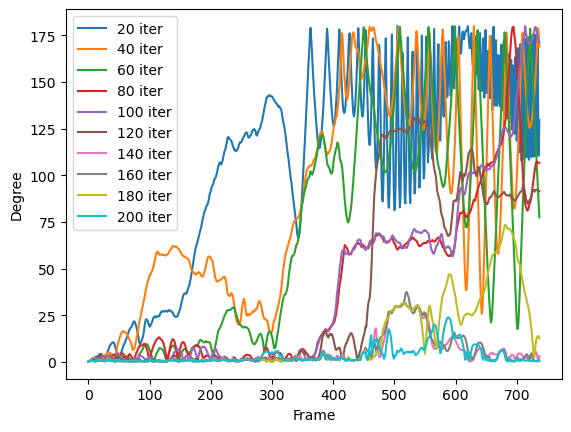

In [62]:
for degree_path in total_degree[1::2]:
	degree = np.load(degree_path)
	iteration = int(degree_path.stem.split("_")[0])
	plt.plot(degree, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Degree')
plt.show()

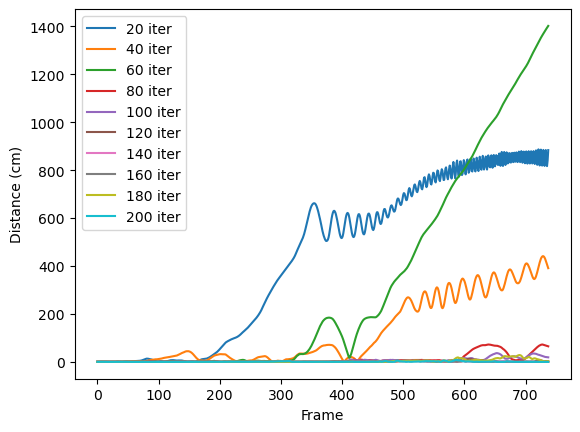

In [63]:
for cm_path in total_cm[1::2]:
	cm = np.load(cm_path)
	iteration = int(cm_path.stem.split("_")[0])
	plt.plot(cm, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Distance (cm)')
plt.show()

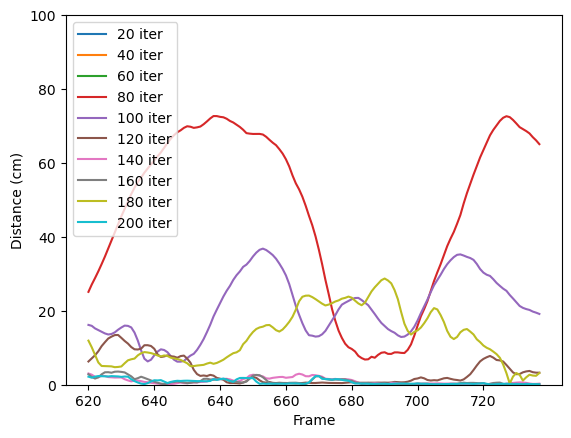

In [70]:
for cm_path in total_cm[1::2]:
	cm = np.load(cm_path)[600:]
	iteration = int(cm_path.stem.split("_")[0])
	plt.plot(cm, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Distance (cm)')
plt.xticks(np.linspace(0, 120, 7, endpoint=True), ['620', '640', '640', '660', '680', '700', '720'])
plt.ylim(0, 100)
plt.show()

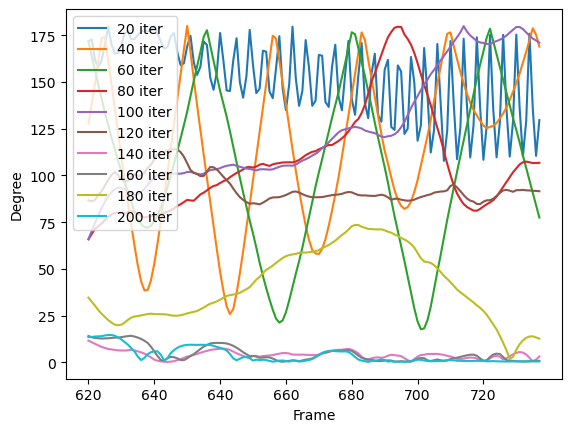

In [71]:
for degree_path in total_degree[1::2]:
	degree = np.load(degree_path)[600:]
	iteration = int(degree_path.stem.split("_")[0])
	plt.plot(degree, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Degree')
plt.xticks(np.linspace(0, 120, 7, endpoint=True), ['620', '640', '640', '660', '680', '700', '720'])
plt.show()

In [72]:
degree_200 = np.load(total_degree[-1])
cm_200 = np.load(total_cm[-1])

In [73]:
def compute_degree_and_cm_ratio(degree, cm, degree_threshold = 5, cm_threshold=5):
	valid = np.logical_and(degree < degree_threshold, cm < cm_threshold)
	return np.sum(valid) / len(valid)

In [75]:
print(compute_degree_and_cm_ratio(degree_200, cm_200, degree_threshold=1, cm_threshold=1))
print(compute_degree_and_cm_ratio(degree_200, cm_200, degree_threshold=3, cm_threshold=3))
print(compute_degree_and_cm_ratio(degree_200, cm_200, degree_threshold=5, cm_threshold=5))
print(compute_degree_and_cm_ratio(degree_200, cm_200, degree_threshold=5, cm_threshold=1))


0.3983739837398374
0.6761517615176151
0.7479674796747967
0.6924119241192412
